# Section 6 - Deep Neural Networks in Pytorch

# PyTorch Instalation

In [0]:
!pip3 install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets                                                    # The Scikit-Learn is used to import datasets.


## Making the dataset

In [0]:
n_pts = 500                                                                     # Number of data points.
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2) # Creation of the dataset.
x_data = torch.Tensor(X)                                                        # Converting the data to tensors.
y_data = torch.Tensor(y.reshape(500, 1))                                        # Converting the labels to tensors.

In [0]:
print(X, y)

[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

#### Plotting the Dataset

##### ***plt.scatter(X[y==0, 0], X[y==0, 1])***
> X[y==0, 0] -> Examples in X that label(y) is 0 -> Select the values of the first position(0) of X.
> X[y==0, 1] -> Examples in X that label(y) is 0 -> Select the values of the second position(1) of X.

##### ***plt.scatter(X[y==1, 0], X[y==1, 1])***
> X[y==1, 0] -> Examples in X that label(y) is 1 -> Select the values of the first position(0) of X.
> X[y==1, 1] -> Examples in X that label(y) is 1 -> Select the values of the second position(1) of X.

In [0]:
# Blue points correspond to label zero -> 0.
# Green points correspond to label one -> 1.
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])                                           # Plots the data with label equals 0.
  plt.scatter(X[y==1, 0], X[y==1, 1])                                           # Plots the data with label equals 1.

> ### This dataset can not be separated with a single line using a Perceptron. So, it is necessary to use a Neural Network or a Multilayer Perceptron to achieve the separation desired.


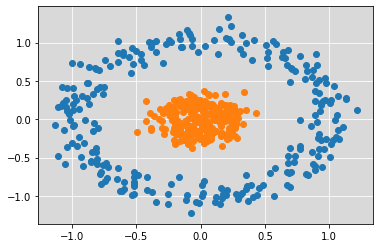

In [0]:
ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.85))
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)

scatter_plot()

## Making and configuring the Neural Networks
> Inheritance Template: class ***class_name***(***module_name***).
  - The class ***class_name*** is inheriting the constructor, attributes and methods from ***module_name***.

In [0]:
class Model(nn.Module):                                                         # Model class is inheriting the constructor, attributes and methods from nn.Module.
  # ---------------------------------------------------------------------------
  # input_size  -> The number of inputs(variables) of the Neural Networks. 
  # H1          -> Represents the hidden layer, one hidden layer in this case.
  # output_size -> The number of outputs of the Neural Networks.
  # ---------------------------------------------------------------------------
  
  def __init__(self, input_size, H1, output_size):                              # The constructor.
    super().__init__()                                                          # Inheriting the constructor from the parent class(nn.Module).
    self.linear = nn.Linear(input_size, H1)                                     # self.linear will store an instance of nn.Linear class. The input will be the input in fact and the output will be the values resulted form hidden layers.
    self.linear2 = nn.Linear(H1, output_size)                                   # self.linear2 will store an instance of nn.Linear class. The input will be the values resulted from hidden layers and the output will be the output in fact.
  def forward(self, x):                                                         # This method can be accessed for every instance of the class.
    x = torch.sigmoid(self.linear(x))                                           # The variable 'x' will store the result from the aplication of sigmoid function to the output of linear model with input x.
    x = torch.sigmoid(self.linear2(x))                                          # The variable 'x' will store the result from the aplication of sigmoid function to the output of linear2 model with input x(previous step).
    return x
  def predict(self, x):                                                         # Model testing method.
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: 
      return 0

In [0]:
torch.manual_seed(2)                                                            # To ensure randomness.
model = Model(2, 4, 1)                                                          # Create an instance of the Neural Networks that has 2 inputs, 4 nodes(perceptrons) in one hidden layer and 1 output.
print(list(model.parameters()))                                                 # Print on screen the model's parameters.

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()                                                        # Defining the Loss function that will be used.

> ### The Adam Optimization Algorithm is a combination of two other extensions of Stochastic Gradiente Descent: *Adagrad* and *RMSprop*. The Adam Optimization Algorithm computes adaptive learning rates for each parameters instead of keep the same learning rates for all parameters.

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)                        # Definition of Optimization Algorithm.

## Executing the ***TRAIN*** step of the Neural Networks

In [0]:
epochs = 1000                                                                   # Number of epochs or interations.
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)                                                # Step of Forward. In this step the data goes through all the Neural Networks generating predictions.
  loss = criterion(y_pred, y_data)                                              # The error between predictions and labels are computed.
  print("epoch:", i, "loss", loss.item())                                       # Print epoch and loss.
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.7148522138595581
epoch: 1 loss 0.6947320699691772
epoch: 2 loss 0.6955163478851318
epoch: 3 loss 0.7014891505241394
epoch: 4 loss 0.7013985514640808
epoch: 5 loss 0.6974702477455139
epoch: 6 loss 0.6939254403114319
epoch: 7 loss 0.6928594708442688
epoch: 8 loss 0.6939384937286377
epoch: 9 loss 0.6954389810562134
epoch: 10 loss 0.6958749294281006
epoch: 11 loss 0.6949177384376526
epoch: 12 loss 0.6931487321853638
epoch: 13 loss 0.6913900375366211
epoch: 14 loss 0.6901611685752869
epoch: 15 loss 0.6894587874412537
epoch: 16 loss 0.6888436079025269
epoch: 17 loss 0.6877667307853699
epoch: 18 loss 0.685900866985321
epoch: 19 loss 0.6832477450370789
epoch: 20 loss 0.6800417304039001
epoch: 21 loss 0.6765585541725159
epoch: 22 loss 0.6729682087898254
epoch: 23 loss 0.6692693829536438
epoch: 24 loss 0.6653285026550293
epoch: 25 loss 0.6609663963317871
epoch: 26 loss 0.656058669090271
epoch: 27 loss 0.6505836248397827
epoch: 28 loss 0.6446024775505066
epoch: 29 loss 0.638197839

> #### It is observed that over the epochs, the error decreases

Text(0.5, 0, 'epoch')

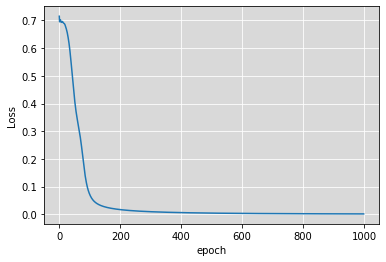

In [0]:
ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.85))
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

## Executing the ***PREDICT*** step of the Neural Networks

In [0]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid) # Predict step
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

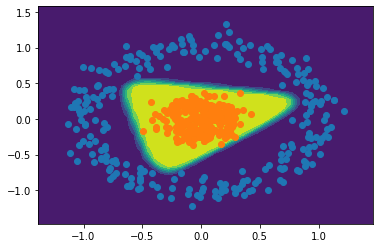

In [0]:
plot_decision_boundary(X, y)

ax = plt.gca()
ax.set_facecolor((0.85, 0.85, 0.85))
plt.grid(color='w', linestyle='solid')
ax.set_axisbelow(True)

scatter_plot()

Prediction is 1


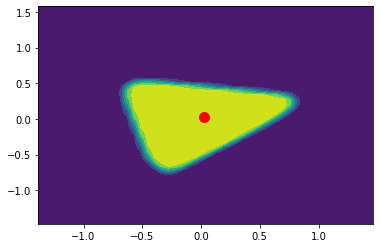

In [0]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)